# INSY695-078 Individual Assignment 1: An end to end ML Project

## Soccer Analytics: Predicting Market Value of Soccer Players

## 1. Framing the problem

In the dynamic and financially significant world of professional soccer, accurately estimating a player's market value is crucial for clubs during transfer windows. The transfer market value of a player is influenced by a variety of factors like their age, contract duration, physical attributes, and playing abilities. The objective of this project is to develop a regression model that can predict the transfer market value of soccer players using available data on the attributes of players. This model can assist soccer clubs, sports analysts, and market stakeholders in making informed decisions during player signings and sales.

## 2. Data Acquisition

For this project, the dataset from EA Sports FC (FIFA) 2024 is used. The dataset contains detailed attributes of over 18,000 players who are currently playing in top-tier leagues globally. The dataset has details about the physical attributes of players (age, height, weight), their current club and contract details, and ratings for their playing attributes, including speed, passing, shooting, and work rate, among others. The current market value (in EUR) for these players is used as the target variable for regression.

#### 2.1 Import Required Libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "assignment1-soccer-analytics"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### 2.2 Import Dataset

In [2]:
players = pd.read_csv('fifa_players.csv')

## 3. Data Exploration

#### 3.1 Take a Quick Look at the Data Structure

In [3]:
players_data_explore = players.copy()


players_data_explore.head()

,value_eur_mn,age,height_cm,weight_kg,club_country,club_playing_status,club_contract_valid_until_year,work_rate_attack_defense,body_type,position,overall,pace,shooting,passing,dribbling,defending,physic,skill_moves
0,181.5,24,182,75,France,starting_xi,2024,High/Low,Unique,Forward,91,97,90,80,92,36,78,5.0
1,185.0,22,195,94,England,starting_xi,2027,High/Medium,Unique,Forward,91,89,93,66,80,45,88,3.0
2,103.0,32,181,75,England,substitute,2025,High/Medium,Unique,Midfield,91,72,88,94,87,65,78,4.0
3,41.0,36,169,67,USA,starting_xi,2025,Low/Low,Unique,Forward,90,80,87,90,94,33,64,4.0
4,51.0,35,185,81,Saudi Arabia,starting_xi,2026,Medium/Medium,Normal,Forward,90,79,88,83,87,39,78,4.0


In [4]:
players_data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18101 entries, 0 to 18100
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   value_eur_mn                    18101 non-null  float64
 1   age                             18101 non-null  int64  
 2   height_cm                       18101 non-null  int64  
 3   weight_kg                       18101 non-null  int64  
 4   club_country                    18101 non-null  object 
 5   club_playing_status             18101 non-null  object 
 6   club_contract_valid_until_year  18101 non-null  int64  
 7   work_rate_attack_defense        18101 non-null  object 
 8   body_type                       18101 non-null  object 
 9   position                        18101 non-null  object 
 10  overall                         18101 non-null  int64  
 11  pace                            18101 non-null  int64  
 12  shooting                        

In [5]:
players_data_explore.describe()

,value_eur_mn,age,height_cm,weight_kg,club_contract_valid_until_year,overall,pace,shooting,passing,dribbling,defending,physic,skill_moves
count,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18069.000000
mean,6.025191,24.515994,180.921772,74.277277,2024.929672,68.440362,69.630407,54.604221,59.853323,65.282471,53.553340,65.655433,2.640655
std,12.772657,4.222268,6.574727,6.817208,1.100062,7.456996,10.740617,14.501668,10.507465,10.062816,17.231844,10.132241,0.684993
min,0.030000,16.000000,158.000000,52.000000,2024.000000,46.000000,28.000000,18.000000,25.000000,28.000000,15.000000,30.000000,2.000000
25%,0.875000,21.000000,176.000000,70.000000,2024.000000,64.000000,63.000000,44.000000,53.000000,59.000000,38.000000,59.000000,2.000000
50%,1.800000,24.000000,181.000000,74.000000,2025.000000,69.000000,70.000000,56.000000,60.000000,66.000000,58.000000,67.000000,3.000000
75%,4.600000,27.000000,185.000000,79.000000,2026.000000,74.000000,77.000000,66.000000,67.000000,72.000000,67.000000,73.000000,3.000000
max,185.000000,39.000000,206.000000,100.000000,2032.000000,91.000000,97.000000,93.000000,94.000000,94.000000,91.000000,90.000000,5.000000


Saving figure attribute_histogram_plots


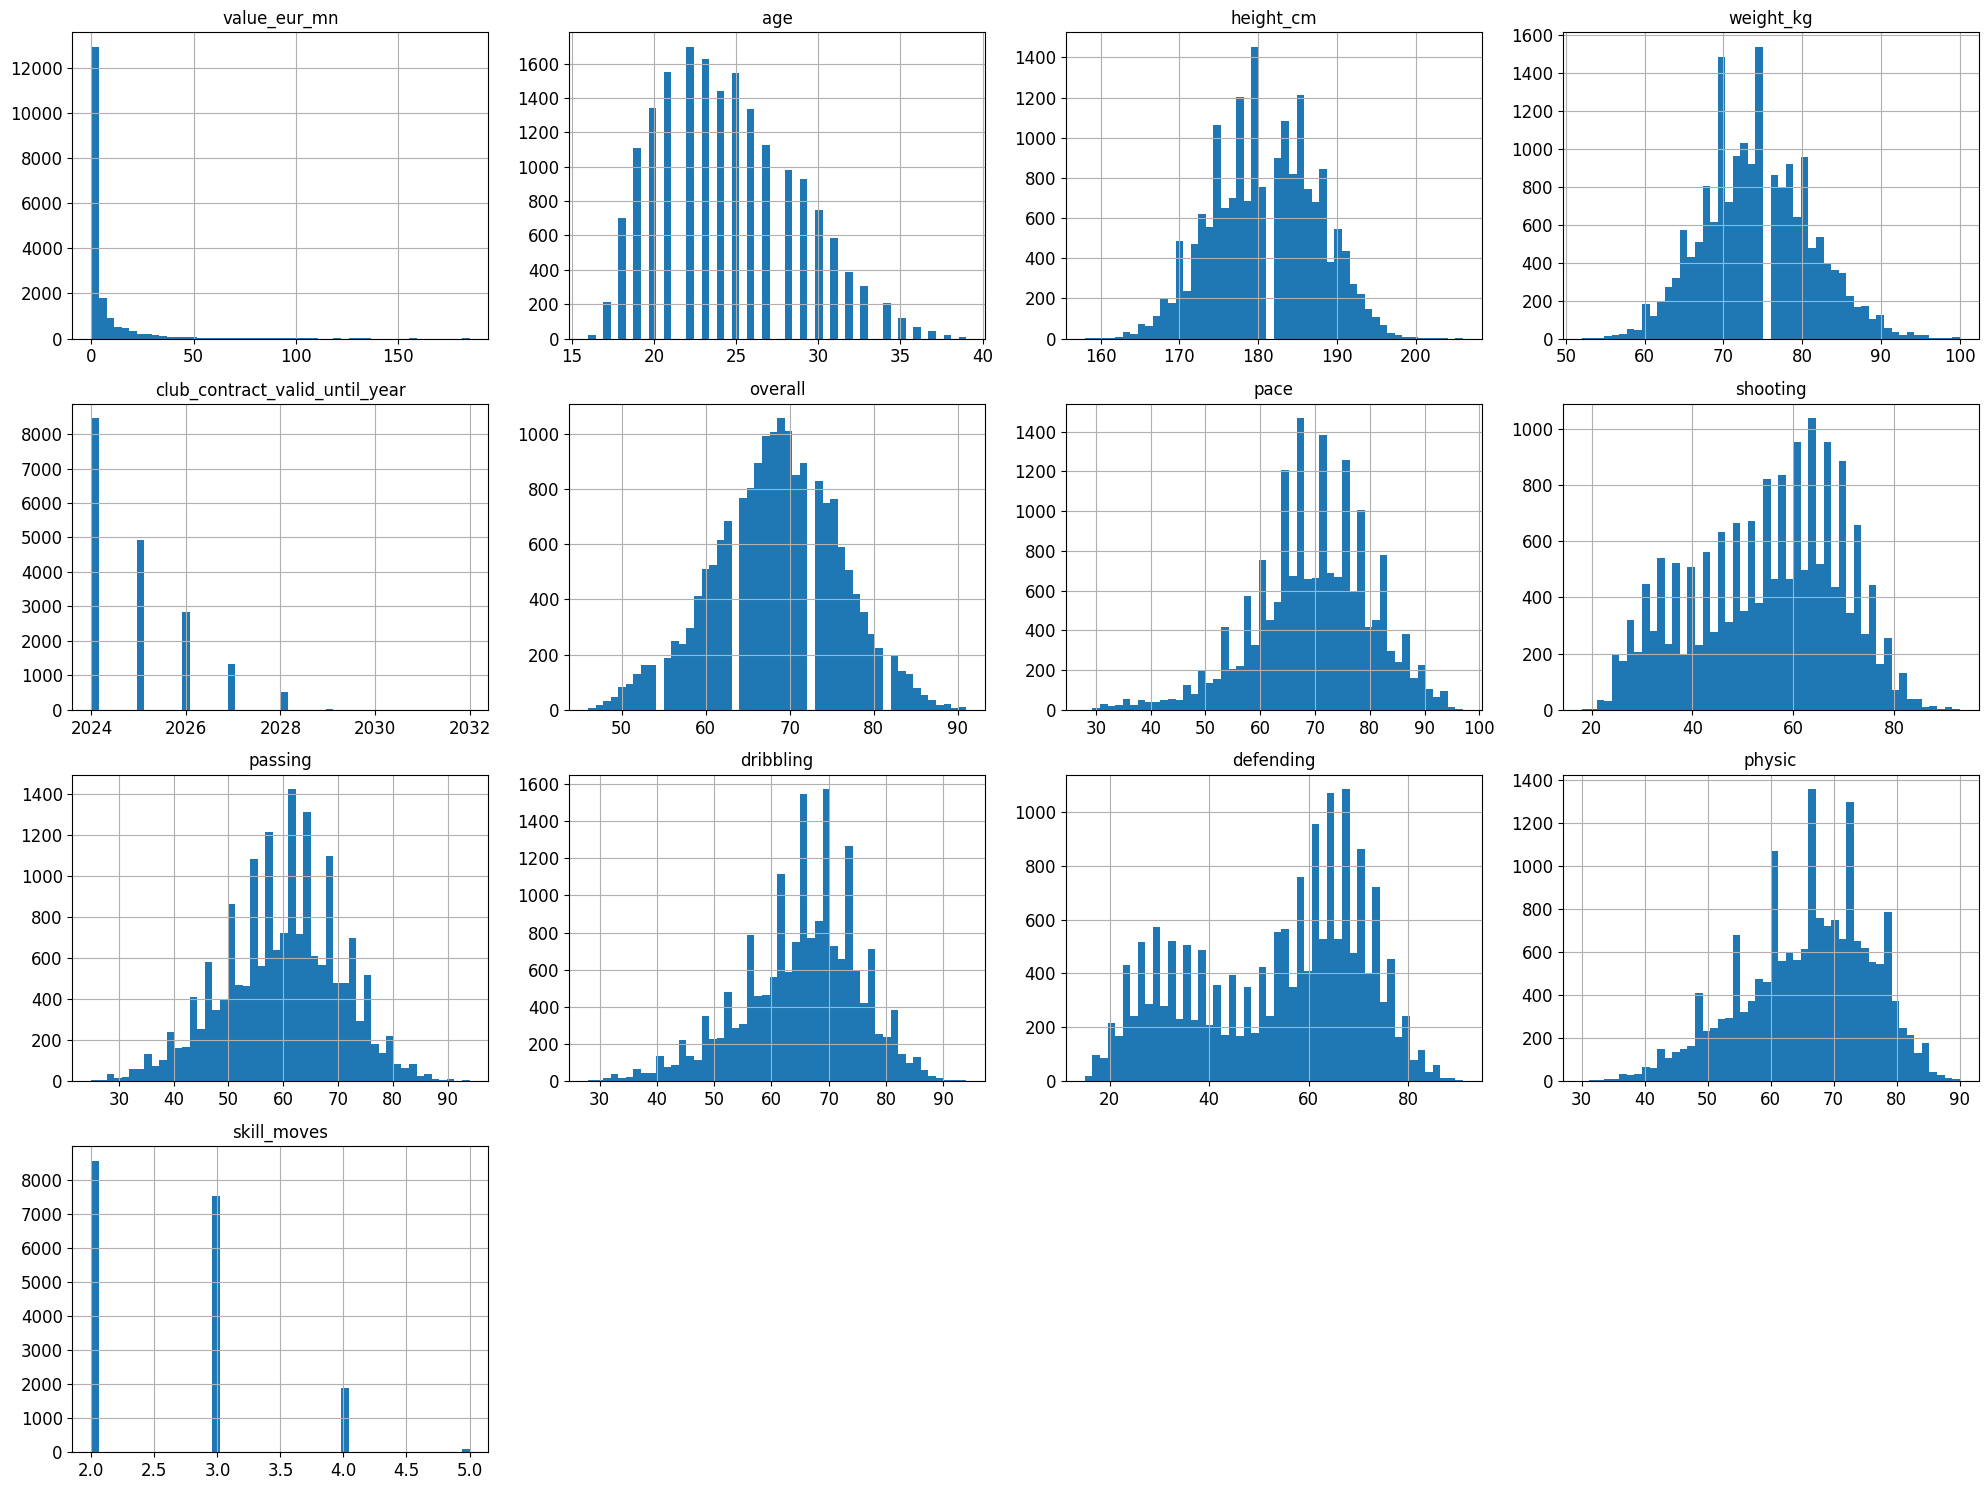

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
players_data_explore.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### 3.2 Looking for Correlations

In [7]:
corr_matrix = players_data_explore.corr()
corr_matrix["value_eur_mn"].sort_values(ascending=False)

value_eur_mn                      1.000000
overall                           0.569490
dribbling                         0.428768
passing                           0.424152
skill_moves                       0.313927
shooting                          0.308908
physic                            0.245183
pace                              0.226825
defending                         0.153665
club_contract_valid_until_year    0.128125
weight_kg                         0.055084
height_cm                         0.037418
age                              -0.000715
Name: value_eur_mn, dtype: float64

Saving figure scatter_matrix_plot


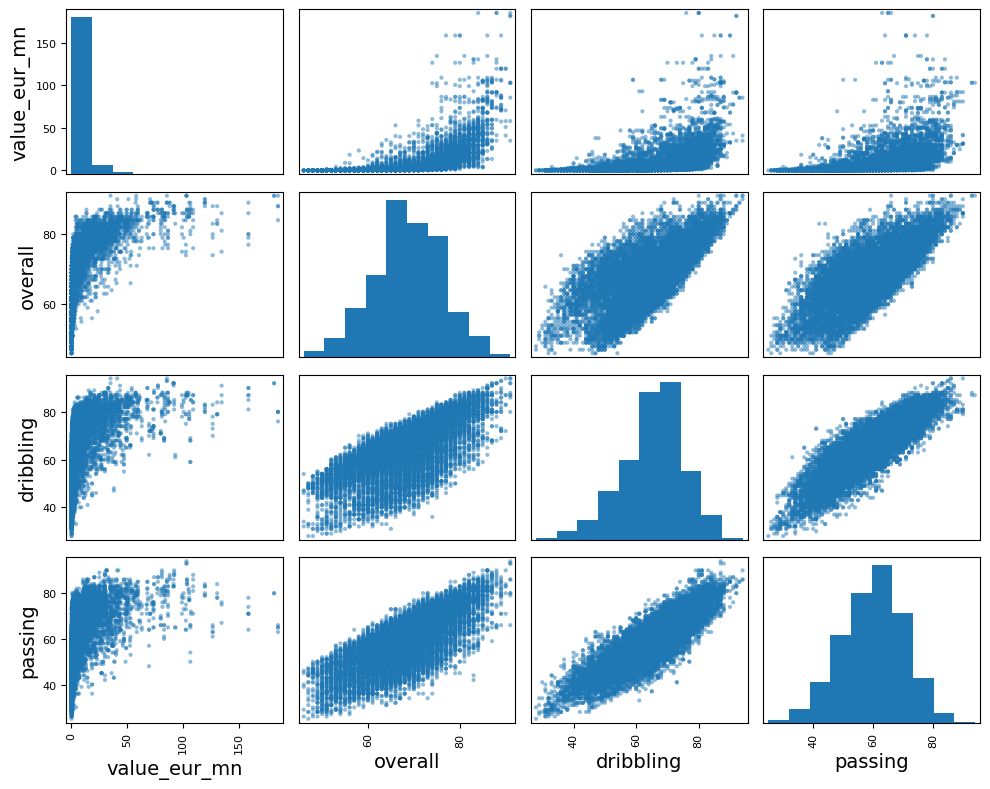

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["value_eur_mn", "overall", "dribbling",
              "passing"]
scatter_matrix(players_data_explore[attributes], figsize=(10, 8))
save_fig("scatter_matrix_plot")

Saving figure overall_rating_vs_player_value_scatterplot


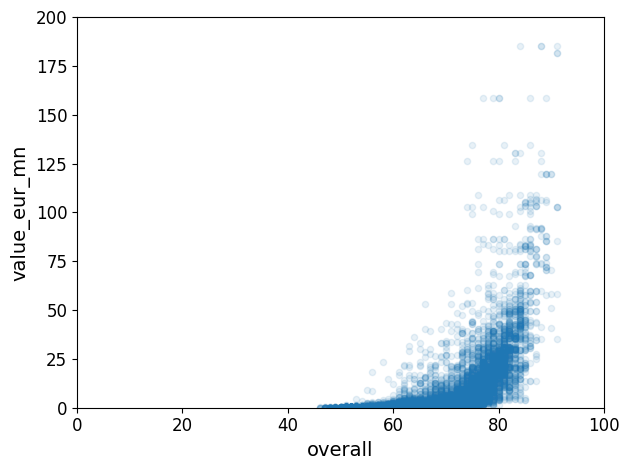

In [9]:
players_data_explore.plot(kind="scatter", x="overall", y="value_eur_mn", alpha=0.1)
plt.axis([0, 100, 0, 200])
save_fig("overall_rating_vs_player_value_scatterplot")

#### 3.3 Experimenting with Attribute Combinations

In [10]:
players_data_explore['rem_contract_yrs'] = players_data_explore['club_contract_valid_until_year'] - 2024
players_data_explore['height_weight_ratio'] = players_data_explore['height_cm']/players_data_explore['weight_kg']
players_data_explore['avg_skills'] = (players_data_explore['pace'] + players_data_explore['shooting'] + players_data_explore['passing'] + 
                                      players_data_explore['dribbling'] + players_data_explore['defending'])/5

corr_matrix = players_data_explore.corr()
corr_matrix["value_eur_mn"].sort_values(ascending=False)

value_eur_mn                      1.000000
overall                           0.569490
avg_skills                        0.474509
dribbling                         0.428768
passing                           0.424152
skill_moves                       0.313927
shooting                          0.308908
physic                            0.245183
pace                              0.226825
defending                         0.153665
club_contract_valid_until_year    0.128125
rem_contract_yrs                  0.128125
weight_kg                         0.055084
height_cm                         0.037418
age                              -0.000715
height_weight_ratio              -0.050836
Name: value_eur_mn, dtype: float64

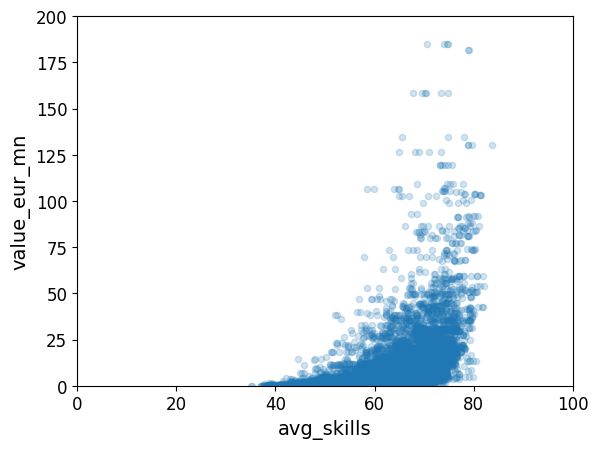

In [11]:
players_data_explore.plot(kind="scatter", x="avg_skills", y="value_eur_mn",
             alpha=0.2)
plt.axis([0, 100, 0, 200])
plt.show()

In [12]:
players_data_explore.describe()

,value_eur_mn,age,height_cm,weight_kg,club_contract_valid_until_year,overall,pace,shooting,passing,dribbling,defending,physic,skill_moves,rem_contract_yrs,height_weight_ratio,avg_skills
count,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18101.000000,18069.000000,18101.000000,18101.000000,18101.000000
mean,6.025191,24.515994,180.921772,74.277277,2024.929672,68.440362,69.630407,54.604221,59.853323,65.282471,53.553340,65.655433,2.640655,0.929672,2.450164,60.584752
std,12.772657,4.222268,6.574727,6.817208,1.100062,7.456996,10.740617,14.501668,10.507465,10.062816,17.231844,10.132241,0.684993,1.100062,0.168450,7.728091
min,0.030000,16.000000,158.000000,52.000000,2024.000000,46.000000,28.000000,18.000000,25.000000,28.000000,15.000000,30.000000,2.000000,0.000000,1.880000,35.000000
25%,0.875000,21.000000,176.000000,70.000000,2024.000000,64.000000,63.000000,44.000000,53.000000,59.000000,38.000000,59.000000,2.000000,0.000000,2.337500,55.200000
50%,1.800000,24.000000,181.000000,74.000000,2025.000000,69.000000,70.000000,56.000000,60.000000,66.000000,58.000000,67.000000,3.000000,1.000000,2.440000,60.800000
75%,4.600000,27.000000,185.000000,79.000000,2026.000000,74.000000,77.000000,66.000000,67.000000,72.000000,67.000000,73.000000,3.000000,2.000000,2.552239,66.000000
max,185.000000,39.000000,206.000000,100.000000,2032.000000,91.000000,97.000000,93.000000,94.000000,94.000000,91.000000,90.000000,5.000000,8.000000,3.296296,83.600000


## 4. Data Preparation

#### 4.1 Creating Test set using StratifiedShuffleSplit

<Axes: >

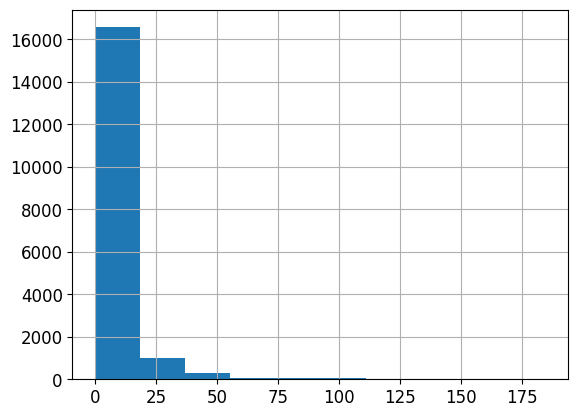

In [13]:
players["value_eur_mn"].hist()

In [14]:
players["value_eur_cat"] = pd.cut(players["value_eur_mn"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

players["value_eur_cat"].value_counts()

1    7938
2    4072
5    3725
3    1555
4     811
Name: value_eur_cat, dtype: int64

<Axes: >

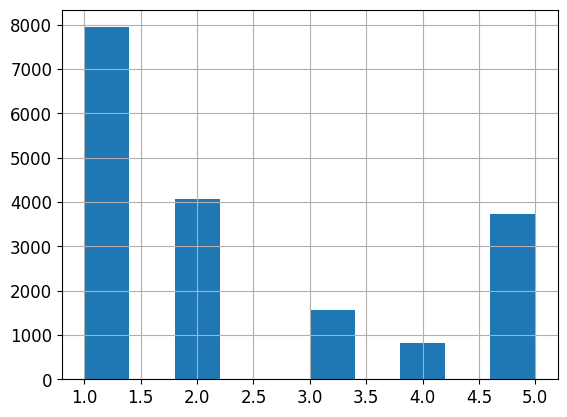

In [15]:
players["value_eur_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(players, players["value_eur_cat"]):
    strat_train_set = players.loc[train_index]
    strat_test_set = players.loc[test_index]

In [17]:
strat_test_set["value_eur_cat"].value_counts() / len(strat_test_set)

1    0.438553
2    0.225076
5    0.205744
3    0.085888
4    0.044739
Name: value_eur_cat, dtype: float64

In [18]:
players["value_eur_cat"].value_counts() / len(players)

1    0.438539
2    0.224960
5    0.205790
3    0.085907
4    0.044804
Name: value_eur_cat, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("value_eur_cat", axis=1, inplace=True)

In [20]:
players = strat_train_set.drop("value_eur_mn", axis=1) # drop labels for training set
players_labels = strat_train_set["value_eur_mn"].copy()

#### 4.2 Data Cleaning

4.2.1 Handling Missing Values

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

players_num = players.select_dtypes(include=[np.number])
imputer.fit(players_num)

SimpleImputer(strategy='median')

In [22]:
#Checking if the values returned by the imputer are the same as the median values of the attributes

imputer.statistics_ , players_num.median().values

(array([  24.,  181.,   74., 2025.,   69.,   70.,   56.,   61.,   66.,
          58.,   67.,    3.]),
 array([  24.,  181.,   74., 2025.,   69.,   70.,   56.,   61.,   66.,
          58.,   67.,    3.]))

4.2.2 Handling Categorical Fields

In [23]:
players_cat = players[["club_country", "club_playing_status", "work_rate_attack_defense", "body_type", "position"]]
players_cat.head(10)

,club_country,club_playing_status,work_rate_attack_defense,body_type,position
10349,Switzerland,starting_xi,Medium/Medium,Normal,Midfield
7400,Netherlands,substitute,Medium/Medium,Lean,Midfield
3680,Germany,substitute,Medium/Medium,Normal,Midfield
11913,Switzerland,starting_xi,Medium/Medium,Lean,Forward
3299,England,starting_xi,Medium/Medium,Stocky,Midfield
8587,England,substitute,Low/Low,Unique,Forward
5922,Italy,bench,Medium/Medium,Normal,Midfield
10523,Saudi Arabia,starting_xi,High/Medium,Stocky,Forward
3316,Saudi Arabia,starting_xi,High/High,Lean,Midfield
17263,France,substitute,Medium/Low,Normal,Forward


In [24]:
# Using OneHotEncoder to encode categorical attributes

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
players_cat_1hot = cat_encoder.fit_transform(players_cat)
cat_encoder.categories_

[array(['England', 'France', 'Germany', 'Italy', 'Netherlands', 'Portugal',
        'Saudi Arabia', 'Spain', 'Switzerland', 'USA'], dtype=object),
 array(['bench', 'starting_xi', 'substitute'], dtype=object),
 array(['High/High', 'High/Low', 'High/Medium', 'Low/High', 'Low/Low',
        'Low/Medium', 'Medium/High', 'Medium/Low', 'Medium/Medium'],
       dtype=object),
 array(['Lean', 'Normal', 'Stocky', 'Unique'], dtype=object),
 array(['Defender', 'Forward', 'Midfield'], dtype=object)]

#### 4.3 Creating Custom Transformers

4.3.1 Custom transformer to add a numeric attribute

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddRemContractYears(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    def fit(self, X, y=None):
        self.club_contract_valid_until_year_ix = X.columns.get_loc(self.column_name)
        return self  
    def transform(self, X):
        X = X.values
        rem_contract_yrs = X[:, self.club_contract_valid_until_year_ix] - 2024
        X_transformed = np.c_[X, rem_contract_yrs]

        X_transformed = np.delete(X_transformed, [self.club_contract_valid_until_year_ix], axis=1)
        
        return X_transformed

attr_adder = AddRemContractYears(column_name="club_contract_valid_until_year")
players_extra_attribs = attr_adder.fit_transform(players)

new_columns = [col for col in players.columns if col not in ["club_contract_valid_until_year"]] + ["rem_contract_yrs"]

players_extra_attribs = pd.DataFrame(
    players_extra_attribs,
    columns=new_columns,
    index=players.index)

players_extra_attribs.head()

,age,height_cm,weight_kg,club_country,club_playing_status,work_rate_attack_defense,body_type,position,overall,pace,shooting,passing,dribbling,defending,physic,skill_moves,rem_contract_yrs
10349,30,175,70,Switzerland,starting_xi,Medium/Medium,Normal,Midfield,71,72,58,65,66,69,78,2.0,2
7400,21,175,65,Netherlands,substitute,Medium/Medium,Lean,Midfield,59,68,50,62,65,53,48,2.0,0
3680,26,186,81,Germany,substitute,Medium/Medium,Normal,Midfield,69,54,42,56,59,69,72,2.0,0
11913,30,190,83,Switzerland,starting_xi,Medium/Medium,Lean,Forward,65,78,65,54,62,32,76,2.0,2
3299,29,180,69,England,starting_xi,Medium/Medium,Stocky,Midfield,70,78,65,68,71,60,68,3.0,1


4.3.2 Custom Transformer to add categoric attributes

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddWorkRate(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    def fit(self, X, y=None):
        self.work_rate_attack_defense_ix = X.columns.get_loc(self.column_name)
        return self  
    def transform(self, X):
        X = X.values
        work_rate_split = np.array([x.split('/') for x in X[:, self.work_rate_attack_defense_ix]])
        work_rate_attack = work_rate_split[:, 0]
        work_rate_defense = work_rate_split[:, 1]

        X_transformed = np.c_[X, work_rate_attack, work_rate_defense]

        X_transformed = np.delete(X_transformed, [self.work_rate_attack_defense_ix], axis=1)
        
        return X_transformed

#### 4.4 Creating Transformation Pipeline

4.4.1 Pipeline for transforming numeric attributes

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('add_rem_contract_yrs', AddRemContractYears(column_name="club_contract_valid_until_year")),
        ('imputer', SimpleImputer(strategy="median")),        
        ('std_scaler', StandardScaler()),
    ])

players_num_tr = num_pipeline.fit_transform(players_num)
players_num_tr

array([[ 1.29705825, -0.89627649, -0.62566835, ...,  1.21546389,
        -0.93828224,  0.97491761],
       [-0.83544199, -0.89627649, -1.35975669, ..., -1.74038577,
        -0.93828224, -0.84613593],
       [ 0.34928037,  0.77541277,  0.98932598, ...,  0.62429396,
        -0.93828224, -0.84613593],
       ...,
       [-0.59849752,  0.62344102,  0.69569065, ..., -1.14921584,
         0.52639292, -0.84613593],
       [ 1.53400273, -0.59233299, -0.18521535, ..., -0.85363087,
         0.52639292,  0.97491761],
       [-1.78321987, -1.65613525, -1.06612135, ..., -1.64185745,
         1.99106809,  1.88544438]])

4.4.2 Pipeline for transforming categoric attributes

In [28]:
cat_pipeline = Pipeline([
    ('add_work_rate', AddWorkRate(column_name="work_rate_attack_defense")),
    ('encoder', OneHotEncoder()),
])

players_cat_tr = cat_pipeline.fit_transform(players_cat)
players_cat_tr

<14480x26 sparse matrix of type '<class 'numpy.float64'>'
	with 86880 stored elements in Compressed Sparse Row format>

4.4.3 Pipeline for combining transformation of numeric and categoric attributes

In [29]:
from sklearn.compose import ColumnTransformer

num_attribs = list(players_num)
cat_attribs = ["club_country", "club_playing_status", "work_rate_attack_defense", "body_type", "position"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

players_prepared = full_pipeline.fit_transform(players)
players_prepared, players_prepared.shape

(array([[ 1.29705825, -0.89627649, -0.62566835, ...,  0.        ,
          0.        ,  1.        ],
        [-0.83544199, -0.89627649, -1.35975669, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.34928037,  0.77541277,  0.98932598, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.59849752,  0.62344102,  0.69569065, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.53400273, -0.59233299, -0.18521535, ...,  0.        ,
          0.        ,  1.        ],
        [-1.78321987, -1.65613525, -1.06612135, ...,  0.        ,
          0.        ,  1.        ]]),
 (14480, 38))

## 5. Modeling

#### 5.1 Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(players_prepared, players_labels)

LinearRegression()

#### 5.2 Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(players_prepared, players_labels)

DecisionTreeRegressor(random_state=42)

#### 5.3 Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(players_prepared, players_labels)

RandomForestRegressor(random_state=42)

#### 5.4 SVM Regression

In [33]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(players_prepared, players_labels)

SVR(kernel='linear')

## 6. Model Evaluation

#### 6.1 Evaluation using MSE on predictions vs actuals

In [34]:
from sklearn.metrics import mean_squared_error

players_predictions_lin = lin_reg.predict(players_prepared)
lin_mse = mean_squared_error(players_labels, players_predictions_lin)

player_prediction_tree = tree_reg.predict(players_prepared)
tree_mse = mean_squared_error(players_labels, player_prediction_tree)

player_prediction_forest = forest_reg.predict(players_prepared)
forest_mse = mean_squared_error(players_labels, player_prediction_forest)

players_predictions = svm_reg.predict(players_prepared)
svm_mse = mean_squared_error(players_labels, players_predictions)

# Print MSE for each model
print("Linear Regression MSE: ", lin_mse)
print("Decision Tree MSE: ", tree_mse)
print("Random Forest MSE: ", forest_mse)
print("SVM MSE: ", svm_mse)

Linear Regression MSE:  84.37617700201635
Decision Tree MSE:  1.7226565511547073e-33
Random Forest MSE:  4.517323665185428
SVM MSE:  117.12070362989377


#### 6.2 Evaluation using Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, players_prepared, players_labels, scoring="neg_mean_squared_error", cv=10)
tree_scores = cross_val_score(tree_reg, players_prepared, players_labels, scoring="neg_mean_squared_error", cv=10)
forest_scores = cross_val_score(forest_reg, players_prepared, players_labels, scoring="neg_mean_squared_error", cv=10)
svm_scores = cross_val_score(svm_reg, players_prepared, players_labels, scoring="neg_mean_squared_error", cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#Print the scores for each model
print("Linear Regression Scores: ")
display_scores(-lin_scores)

print("\nDecision Tree Scores: ")
display_scores(-tree_scores)

print("\nRandom Forest Scores: ")
display_scores(-forest_scores)

print("\nSVM Scores: ")
display_scores(-svm_scores)

Linear Regression Scores: 
Scores: [ 80.52613179  85.18509482  79.72063997  89.1629367   73.33244993
  75.8814227   87.03509722 104.31692468  92.91850147  80.72696529]
Mean: 84.88061645855119
Standard deviation: 8.617631834729213

Decision Tree Scores: 
Scores: [61.83895451 80.42727707 72.46884934 41.91385313 87.17554009 42.92608292
 77.74129278 60.93786447 77.6248317  69.08568018]
Mean: 67.21402261912985
Standard deviation: 14.565922734518693

Random Forest Scores: 
Scores: [29.30550566 41.06536495 32.641366   27.38104303 33.31399386 29.05872991
 41.3063104  33.23083176 31.95813757 26.59049948]
Mean: 32.58517826338225
Standard deviation: 4.8531162913089485

SVM Scores: 
Scores: [106.71372091 120.3213884  107.46466776 129.32105124 106.72328491
  98.37261837 116.72558209 145.39785054 129.58351916 112.339813  ]
Mean: 117.29634963823415
Standard deviation: 13.408420970441673


## 7. Model Selection

The Random Forest model is selected due to its significantly lower Mean Squared Error (MSE) of 32.58 (using cross validation), indicating a higher accuracy in prediction compared to the other models. While Random Forest models are relatively simple to implement, they also offer a degree of explainability through options like feature importance scores, making it easier to interpret how different predictors influence the model's predictions. This balance of high accuracy, simplicity, and interpretability makes the Random Forest model a preferred choice for this project.

## 8. Model Fine-Tuning

#### 8.1 Using Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(players_prepared, players_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
#Print the parameters and scores for each combination in the grid search

cvres = grid_search.cv_results_

sorted_indices = np.argsort(-cvres["mean_test_score"])

for index in sorted_indices:
    mean_score = np.sqrt(-cvres["mean_test_score"][index])
    params = cvres["params"][index]
    print(mean_score, params)

5.924450059702445 {'max_features': 8, 'n_estimators': 30}
6.028841927211447 {'max_features': 6, 'n_estimators': 30}
6.169037438460639 {'max_features': 4, 'n_estimators': 30}
6.194634314250747 {'max_features': 8, 'n_estimators': 10}
6.286975022977051 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
6.3636236883593025 {'max_features': 6, 'n_estimators': 10}
6.363776266244462 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.409319113595172 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
6.477666063964678 {'max_features': 4, 'n_estimators': 10}
6.505290324289735 {'max_features': 2, 'n_estimators': 30}
6.949898482075354 {'max_features': 2, 'n_estimators': 10}
7.208346489944242 {'max_features': 6, 'n_estimators': 3}
7.224407481728515 {'max_features': 8, 'n_estimators': 3}
7.343665973018231 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
7.5916908286883045 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7.6451552954809 {'bootstrap': Fa

#### 8.2 Using Randomized Search

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(players_prepared, players_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000231ADB1EE50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000231ADA12710>},
                   random_state=42, scoring='neg_mean_squared_error')

In [39]:
#Print the parameters and scores for each combination in the randomized search

cvres = rnd_search.cv_results_

sorted_indices = np.argsort(-cvres["mean_test_score"])

for index in sorted_indices:
    mean_score = np.sqrt(-cvres["mean_test_score"][index])
    params = cvres["params"][index]
    print(mean_score, params)

5.7884916085012685 {'max_features': 7, 'n_estimators': 122}
5.791057337519469 {'max_features': 7, 'n_estimators': 180}
5.962425116236418 {'max_features': 5, 'n_estimators': 100}
6.205084045483325 {'max_features': 5, 'n_estimators': 21}
6.2153819812581945 {'max_features': 3, 'n_estimators': 150}
6.221437345256346 {'max_features': 3, 'n_estimators': 88}
6.225588540691791 {'max_features': 3, 'n_estimators': 75}
6.228735863568155 {'max_features': 3, 'n_estimators': 72}
6.316576516950498 {'max_features': 5, 'n_estimators': 15}
8.127115645774085 {'max_features': 5, 'n_estimators': 2}


#### 8.3 Finalize the best model after fine-tuning

After model fine-tuning, we select the best estimator determined by Randomized Search since it gave the lowest MSE among all the models evaluated using Grid Search and Randomized Search

In [40]:
best_model = rnd_search.best_estimator_
best_model

RandomForestRegressor(max_features=7, n_estimators=122, random_state=42)

## 9. Solution Presentation

#### 9.1 Model Explanation using Feature Importance Scores

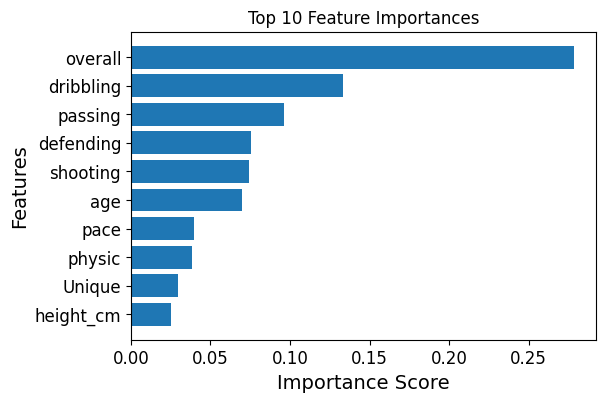

Feature Importance Scores: [(0.27840388347534734, 'overall'), (0.13309683359061247, 'dribbling'), (0.09611054996081206, 'passing'), (0.07548236985855206, 'defending'), (0.07444005022634378, 'shooting'), (0.06955106108521636, 'age'), (0.039672476839256655, 'pace'), (0.03855692701017378, 'physic'), (0.029339439127303506, 'Unique'), (0.02551945418064426, 'height_cm'), (0.024684926678856137, 'weight_kg'), (0.021594628589168694, 'skill_moves'), (0.014936440737307596, 'rem_contract_yrs'), (0.006287710419412115, 'WorkRateDefense_High'), (0.005923493953361225, 'Spain'), (0.0053603671341896815, 'Lean'), (0.0050149766456208675, 'starting_xi'), (0.004930800112192505, 'Normal'), (0.004667096056246763, 'England'), (0.004437438559818395, 'Forward'), (0.0043890197829455765, 'WorkRateDefense_Medium'), (0.004168990562328836, 'Midfield'), (0.0037813447912797807, 'WorkRateAttack_Medium'), (0.0037010336704847305, 'WorkRateAttack_High'), (0.0036625496907139155, 'Germany'), (0.003474766856565046, 'substitut

In [41]:
feature_importances = best_model.feature_importances_

cat_attribs_final = []
for col in full_pipeline.named_transformers_["cat"].named_steps['encoder'].categories_:
    cat_attribs_final.extend(col)

for i in range(20,23):
    cat_attribs_final[i] = "WorkRateAttack_" + cat_attribs_final[i]
for i in range(23,26):
    cat_attribs_final[i] = "WorkRateDefense_" + cat_attribs_final[i]

num_attribs_final = [attr for attr in num_attribs if attr != 'club_contract_valid_until_year']
attributes = num_attribs_final + ['rem_contract_yrs'] + cat_attribs_final

feature_imp = sorted(zip(feature_importances, attributes), reverse=True)

top_10_features = feature_imp[:10]  
scores, names = zip(*top_10_features)

plt.figure(figsize=(6, 4))
plt.barh(range(len(scores)), scores, align='center')
plt.yticks(range(len(scores)), names)
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()

print("Feature Importance Scores:", feature_imp)

#### 9.2 Interpretation of Results

The feature importance scores from the random forest model reveal that 'overall' player rating is the most influential factor in determining a player's market value. Attributes such as 'dribbling', 'passing', 'defending', and 'shooting' are also relevant, highlighting the importance of technical skills in valuing players. Interestingly, physical attributes like 'age', 'height_cm', and 'weight_kg', along with contract duration ('rem_contract_yrs'), have lesser but still significant impacts, suggesting a balanced consideration of skills, physicality, and potential future contribution in the market value of a player.

#### 9.3 Conclusions

The insights derived from the model provide an initial framework for clubs and agents to assess the market value of players based on key attributes, ensuring that negotiations for buying or selling players are backed by data-driven valuations. By understanding the factors that most significantly impact a player's market value, such as overall rating, technical skills, and physical attributes, stakeholders can make informed decisions that align with the financial and strategic goals of their clubs. This model allows stakeholders to determine optimal asking prices for players they wish to sell and establish fair price points for potential acquisitions, thereby optimizing their investment in the transfer market and creating a more transparent and rational player valuation process.

#### 9.4 Next Steps

In this model, we have only considered the dataset containing the physical attributes of players, their current club and contract details, and their playing attributes. For next steps, expanding the dataset to include historical performance stats of players such as minutes played, goals scored, assists, and clean sheets can improve the model's accuracy since these factors are also critical in deciding the market value of a player. Adding these additional predictors will allow for a more detailed understanding of a player's value, taking into account their direct contributions to matches, thereby improving the model's capability to predict market value with greater accuracy.


## 10. Launching, monitoring, and maintenance

#### 10.1 Evaluating model on test data

In [43]:
X_test = strat_test_set.drop("value_eur_mn", axis=1)
y_test = strat_test_set["value_eur_mn"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = best_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
conf_int = stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors))

print("MSE on test dataset:", final_mse)
print("95% Confidence Interval:", conf_int)

MSE on test dataset: 38.38013079189133
95% Confidence Interval: (26.17373799368631, 50.586523590096355)


#### 10.2 Creating a Full Pipeline for both Data Preparation and Prediction

In [44]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("model", best_model)
    ])

full_pipeline_with_predictor.fit(players, players_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('add_rem_contract_yrs',
                                                                   AddRemContractYears(column_name='club_contract_valid_until_year')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height_cm',
                                                   'weight_kg',
                                                   'club_contract_valid_until_year',
                                                   'overall', 'pace',
                                                   'shooting', 'p...g',
                                                   'dribbling', 'defending',
                                                   'physic', 'skill_moves']),
                                                 ('cat',
                                                  Pipeline(steps=[('add_work_rate',
                                                                   AddWorkRate(column_name='work_rate_attack_defense')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['club_country',
                                                   'club_playing_status',
                                                   'work_rate_attack_defense',
                                                   'body_type',
                                                   'position'])])),
                ('model',
                 RandomForestRegressor(max_features=7, n_estimators=122,
                                       random_state=42))])

#### 10.3 Saving the model (Model Persistence)

In [46]:
import joblib

soccer_model = full_pipeline_with_predictor
joblib.dump(soccer_model, "soccer_model.pkl")

['soccer_model.pkl']